In [22]:
!pip install dtaidistance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.6 MB/s eta 0:00:00


dynamic tyme wrapping:

In [23]:
!pip install fastdtw

In [24]:
import pandas as pd
import yfinance as yf
import numpy as np
from fastdtw import fastdtw
import matplotlib.pyplot as plt


In [25]:
ticker_1 = yf.Ticker("TSLA")
ticker_2 = yf.Ticker("AMZN")

data_1 = ticker_1.history(period="1y")
data_2 = ticker_2.history(period="1y")

series_1 = data_1['Close'].values
series_2 = data_2['Close'].values

DTW distance between s1 and s2: 32.0000


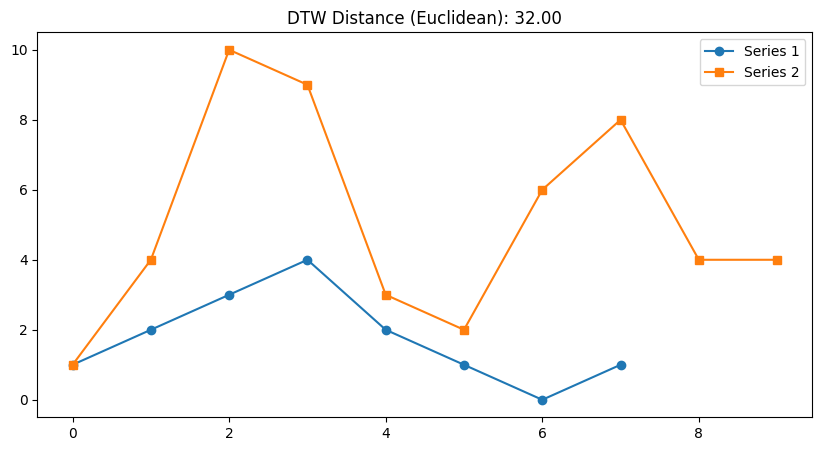

In [26]:
import pandas as pd
from fastdtw import fastdtw
import matplotlib.pyplot as plt
import numpy as np

# Example time series
series_1 = np.array([1, 2, 3, 4, 2, 1, 0, 1])
series_2 = np.array([1, 4, 10, 9, 3, 2, 6, 8, 4, 4])

# Compute DTW distance and path using Euclidean distance
distance, path = fastdtw(s1, s2, dist=lambda x,y:abs(x-y))
print(f"DTW distance between s1 and s2: {distance:.4f}")

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(series_1, label="Series 1", marker='o')
plt.plot(series_2, label="Series 2", marker='s')
plt.title(f"DTW Distance (Euclidean): {distance:.2f}")
plt.legend()
plt.show()


In [27]:
distance/len(path)

2.909090909090909

DTW distance between s1 and s2: 32.0000


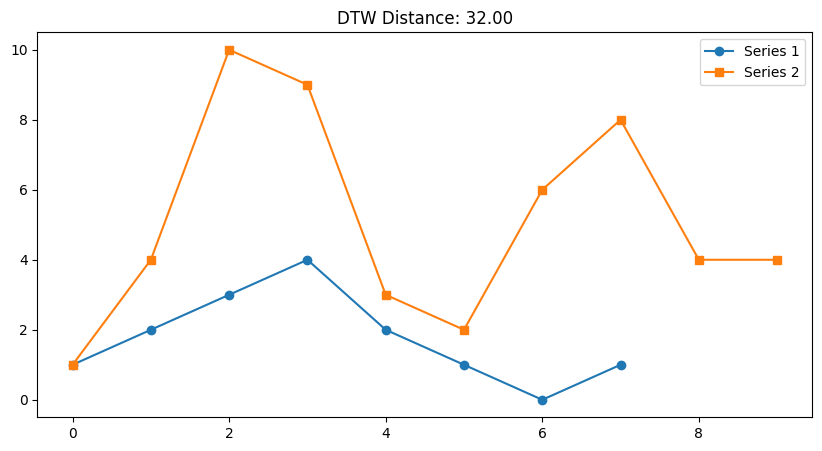

In [28]:
import pandas as pd
from fastdtw import fastdtw
import numpy as np
import matplotlib.pyplot as plt

# Example time series
series_1 = pd.Series([1, 2, 3, 4, 2, 1, 0, 1])
series_2 = pd.Series([1, 4, 10, 9, 3, 2, 6, 8, 4, 4])

# Convert to 1D NumPy arrays
s1 = np.array(series_1, dtype=float)
s2 = np.array(series_2, dtype=float)

# Compute DTW distance with element-wise distance
distance, path = fastdtw(s1, s2, dist=lambda x, y: abs(x - y))
print(f"DTW distance between s1 and s2: {distance:.4f}")

# Plot both series
plt.figure(figsize=(10, 5))
plt.plot(s1, label="Series 1", marker='o')
plt.plot(s2, label="Series 2", marker='s')
plt.title(f"DTW Distance: {distance:.2f}")
plt.legend()
plt.show()


🔹 What is Dynamic Time Warping (DTW)?

Dynamic Time Warping (DTW) is an algorithm used to measure similarity between two temporal sequences (time series) that may vary in speed or timing.

👉 Example:
Imagine you want to compare two walking patterns (or two stock price curves, or two ECG signals).
One person may walk faster than the other — so their step patterns are similar but shifted in time.
DTW helps align these sequences non-linearly in time to find how similar they really are.

🔹 Why DTW is used?

Because simple distance measures like Euclidean distance fail when there are time shifts or speed variations.

Example:

Two sequences:

A = [1, 2, 3, 4, 5]
B = [1, 1, 2, 3, 4, 5, 5]


Even though they represent the same pattern, one is slower (longer).
Euclidean distance says they’re very different ❌.
DTW says they’re actually similar ✅ — because it warps (stretches/compresses) time to align them.

🔹 How it works (Intuition)

DTW builds a distance matrix between the two time series, then finds the optimal warping path (a path through this matrix) that gives the minimum cumulative distance.

You compute a cost for each pair of points (i, j) — how different they are.

Then you find the minimum-cost path through this matrix that aligns all points.

The total cost along this path = DTW distance.

This is done using Dynamic Programming.

🔹 Formula / Recurrence Relation

Let D(i, j) be the minimum distance up to point i in sequence A and point j in sequence B:

𝐷
(
𝑖
,
𝑗
)
=
∣
𝐴
𝑖
−
𝐵
𝑗
∣
+
min
⁡
[
𝐷
(
𝑖
−
1
,
𝑗
)
,

𝐷
(
𝑖
,
𝑗
−
1
)
,

𝐷
(
𝑖
−
1
,
𝑗
−
1
)
]
D(i,j)=∣A
i
	​

−B
j
	​

∣+min[D(i−1,j), D(i,j−1), D(i−1,j−1)]

The final DTW distance is D(n, m) (bottom-right corner of the matrix).

🔹 Where DTW is used

⏱ Speech recognition (matching spoken words that vary in speed)

💓 Medical signal analysis (ECG alignment)

📈 Time series clustering & classification

🐦 Gesture or motion recognition

💰 Financial data pattern matching

🔹 Summary
Concept	Explanation
Full Name	Dynamic Time Warping
Purpose	Measure similarity between two time-dependent sequences with time distortion
Why Needed	Handles speed/phase variations that simple Euclidean distance can’t
Technique Used	Dynamic programming for optimal time alignment
Output	Minimum cumulative alignment distance

If you want, I can show you a simple Python example with visualization (using dtw or fastdtw library) to make this concept crystal clear.
Would you like that?

You said:
how it can be used in stoke market predidction and forcasting
ChatGPT said:

Excellent question — and a very practical one 👏

Let’s break it down carefully:

📈 Using Dynamic Time Warping (DTW) in Stock Market Prediction and Forecasting

DTW is not a forecasting model by itself —
it’s a similarity measure used to compare two time series that might have different lengths, speeds, or patterns.

But in stock market analysis, that similarity information can be very powerful when used correctly.

🔹 1. Pattern Matching in Historical Data

DTW can help you find past periods in a stock’s price history that behave similarly to the current market movement.

Example:

You have:

The recent 30-day price movement of NIFTY 50.

Historical data from 2010–2025.

You can use DTW to:

Compare the current 30-day trend to every past 30-day window in history.

Find periods that have the most similar pattern (smallest DTW distance).

Once you find those:

You can analyze what happened next in those past periods.

That gives a data-driven prediction of how the market might behave this time.

🧠 This is called analogue-based forecasting or pattern similarity forecasting.

🔹 2. Clustering Stocks or Time Periods

DTW can also be used to cluster:

Different stocks (e.g., which companies have similar price patterns),

Or different time segments of a single stock.

For example:

Cluster sectors (IT, Pharma, Energy) using DTW distance between their daily closing prices.

Identify which stocks move together or follow similar temporal trends.

This helps in:

Portfolio diversification,

Risk management,

Identifying leading/lagging stocks.

🔹 3. Feature Engineering for ML Models

If you’re training a machine learning forecasting model (like LSTM, XGBoost, or Random Forest),
you can use DTW to generate similarity-based features.

For instance:

Compute DTW distance between current window and several “prototype” patterns (bullish, bearish, sideways).

Add these distances as features to the model.

It helps the model understand pattern resemblance, not just raw values.

🔹 4. Comparing Forecast Models

After forecasting stock prices using two or more models (say ARIMA and LSTM),
DTW can compare the shape of predicted vs. actual curves — even if they are shifted in time.

✅ This gives a better shape-based accuracy metric than traditional RMSE or MAPE.

🔹 5. Multivariate DTW

You can also use DTW on multiple correlated time series:

Stock price

Volume

Moving averages

Technical indicators (RSI, MACD)

This version is called Multivariate DTW (MDTW) — it aligns all series simultaneously, capturing joint temporal behavior.

In [29]:
import pandas as pd
df1=pd.read_csv('/content/WIPRO.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/WIPRO.csv'

In [ ]:
df1.head()

In [ ]:
df2=pd.read_csv('/content/TCS.csv')

In [ ]:
df2.head()

In [ ]:
df1['Date']=pd.to_datetime(df1['Date'])
df2['Date']=pd.to_datetime(df2['Date'])

df1=df1.sort_values('Date')
df2=df2.sort_values('Date')

# df1['Close'] = df1['Close'].fillna(df1['Close'].mean())
# df2['Close'] = df2['Close'].fillna(df2['Close'].mean())
df1.dropna()
df2.dropna()


In [ ]:
merged = pd.merge(df1[['Date', 'Close']], df2[['Date', 'Close']], on='Date', suffixes=('_wipro', '_tcs'))
merged=merged.iloc[:500,:]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
merged[['Close_wipro', 'Close_tcs']] = scaler.fit_transform(merged[['Close_wipro', 'Close_tcs']])

# Plot closing prices for common dates
plt.figure(figsize=(12,6))
plt.plot(merged['Date'], merged['Close_wipro'], label='Stock 1 (wipro)', linewidth=2)
plt.plot(merged['Date'], merged['Close_tcs'], label='Stock 2 (tcs)', linewidth=2)

plt.title('Stock 1 vs Stock 2 Close Price (Common Dates Only)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (₹)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Show info about overlap
print("Common Date Range:", merged['Date'].min(), "to", merged['Date'].max())
print("Total Common Days:", len(merged))

In [ ]:
merged.head()

In [ ]:
distance =dtw.distance(merged['Close_wipro'], merged['Close_tcs'])
fastdtw(np.array(merged['Close_wipro']), np.array(merged['Close_tcs']))


1. Scale dependence

Suppose:

Wipro’s prices are around ₹450–₹550

TCS’s prices are around ₹3500–₹4000

Then even if their patterns are identical (shape-wise),
DTW distance will be large just because TCS prices are on a higher scale.

👉 That’s why we normalize or standardize first.

In [ ]:
normalized_distance = distance / len(merged)


In [ ]:
normalized_distance